<a href="https://colab.research.google.com/github/sonahyoung/class2022Spring/blob/main/scikit_learn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn for machine learning

### Understanding iris data

In [1]:
import seaborn as sns
df = sns.load_dataset('iris')

In [ ]:
type(df)

In [ ]:
df.head()

In [ ]:
df['species'].unique()

In [ ]:
sns.pairplot(df, hue='species')

In [ ]:
x = list(df['sepal_length'])
y = list(df['sepal_width'])

import matplotlib.pyplot as plt
plt.scatter(x, y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [ ]:
df_setosa = df[df['species']=='setosa']
x = list(df_setosa['sepal_length'])
y = list(df_setosa['sepal_width'])
plt.scatter(x, y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('setosa')

### Supervised learning: regression (linear regression)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression(fit_intercept=True)

In [10]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [ ]:
X = x.reshape(-1, 1)
X.shape

In [ ]:
model.fit(X, y)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [15]:
xfit = np.linspace(4, 6)

In [16]:
Xfit = xfit.reshape(-1, 1)
yfit = model.predict(Xfit)

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
df_setosa.corr()

#### gradio implementation

In [ ]:
!pip install gradio
import gradio as gr

def test (x):
  X = np.array(x).reshape(-1,1)
  y = model.predict(X)
  return y[0]

iface = gr.Interface(test, inputs = ["number"], outputs = ["text"])
iface.launch(debug=True)

### Supervised learning: classification (Naive Bayes)

output에 category가 있으면 classification.

Naive Bayes 외에 logistic regression도 있고, support vector machine(SVM) 이런게 있음. 대표적인 것들임. 근데 요즘에는 이런거 안쓰고 NN을 씀.



In [21]:
x = df.drop('species', axis=1) # axis = 0 (delete row) / 1 (delete column)
#species에 해당하는 부분을 버리는 거임.
x.shape   #그래서 (150,4) 2d array가 나오는 거임

(150, 4)

In [22]:
y = df['species']   #여기는 species만 남기는 거임. 1 column만
y.shape 

(150,)

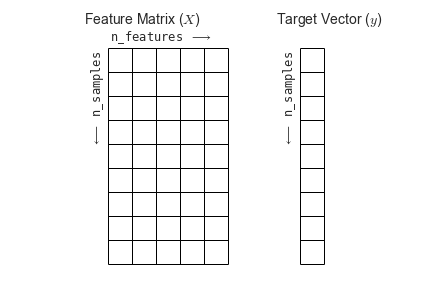

In [25]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y)
#쪼갠 이유는? 나중에 가지고 test가지고 test해보려고, Xtrain, ytrain은 model.fit할때만 씀
#fit한다 = model을 훈련시킨다.
#Xtrain, ytrain -> 훈련용 데이터 (model.fit할때는 이걸 쓰고) - 150개중에 Xtrain은 112개, ytrain도 112개
#Xtest, ytest -> 테스트용 데이터 (그래서 model.predict할때는 이걸 씀) - 150개 중에 Xtest는 38개, ytest도 38개

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model   #model부터 메모리에 올려놨다
model.fit(Xtrain, ytrain)                  # 3. fit model to data   #그걸 가지고 fit한다. 여기 모델은 y=ax+b는 아니지만 상상을 그렇게 해라. 거기 a와 b를 parameter라고 하는데, Xtrain, Ytrain이라는 데이터에서 fit해라. estimate해라. 위의 x가 Xtrain, y가 ytrain임.
#Xtrain, ytrain으로 이름이 달라진 이유는 위의 셀때문임. x와 y를 위에서 쪼갰음. split했음. 쪼개서 일부는 Xtrain, ytrain으로 나머지는 Xtest, ytest로 쪼갰음

In [29]:
yout = model.predict(Xtest)                # 4. predict on new data
#y=ax+b는 아니지만, parameter가 estimate된거라고 생각하기.
#predict를 할때는 a와 b 값이 다 정해진거나 다름없기 때문에 x값만 넣으면 됨. Xtest의 38개 데이터를 넣는거임.
#여기서는 ytest는 이 상태에서는 쓸 필요없음. x만 넣으면 됨. 그리고 나서 y가 얼마나 잘 맞았는지 비교해보면 됨.

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, yout)   #ytest과 yout을 비교하는 거임.
#yout은 위에서 모델이 예측한거라고 생각하면 됨. ytest는 원래 데이터에 있던 값임.
#결과값을 보면 95% 정도 정확하게 맞추고 있다는 걸 알 수 있음.

0.9473684210526315

#### gradio implementation

In [ ]:
import pandas as pd   #model이 만들어졌으나 그걸로 gradio를 만들어볼 수 있음.
def test (in1, in2, in3, in4):  #4가지 숫자값을 입력으로 주는 함수를 만들었음.
  data = {'sepal_length': [in1],
        'sepal_width': [in2],
        'petal_length': [in3],
        'petal_width': [in4]}
  Xtest = pd.DataFrame(data)
  yout = model.predict(Xtest)  #그거를 우리가 위에서 훈련시켰던 모델에 넣어주면 값을 뱉어주는 데 그걸 return해주면 된다.
  return yout

iface = gr.Interface(test, inputs = ["number", "number", "number", "number"], outputs = ["text"])
iface.launch()

### Unsupervised learning: dimensionality (PCA)
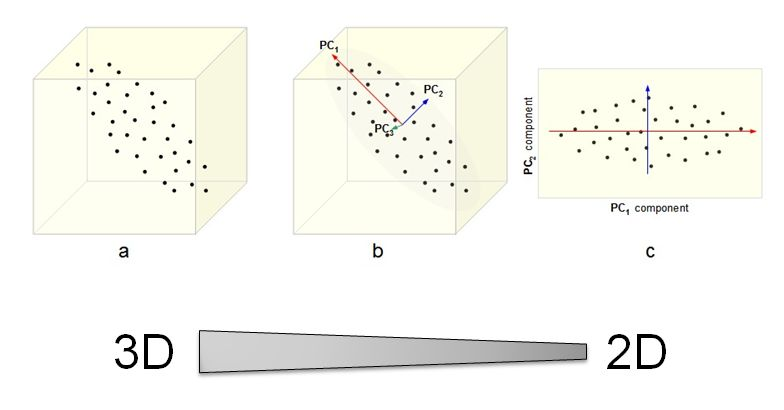

PCA는 너무너무너무너무 중요함. 개념을 잘 알아야함.

principal component analysis임.

(그림에서)

3D의 한점은 [15,3,7] 이런 숫자값이 될 수 있음. 근데 iris 데이터에서는 숫자값이 4개였음. [ , , , ] => 이걸 한점으로 나타낼 수 있을까?

([15,3,7] 이런 숫자값을 사실은 3차원 vector라고 함. 같은 말로 3d array라고 함.)

4차원의 공간에서 어떤 점하고 일치할거임.

3d를 일종의 구름덩어리라고 생각하자. 입체를 갖는 cloud라고 상상하자. 각각의 축을 x1, x2, x3라고 할때 각 축이 이루는 각도는 90도이다. 각도는 그대로 유지가 됨. (가운데 그림에서 각도가 유지됨)

그 상태에서 원점을 이동시키고 rotate을 잘 시켜서 가장 이 데이터를 잘 관통하게 만듬. (타원형 깡통이 있을때, 제일 긴 반지름은 PC1, 짧은 반지름을 PC2, 높이를 PC3라고 생각하면 됨)

PC1은 principal component, 주요소라고함.

가운데 그림은 여전히 3차원임. 축이 바뀐 것뿐임. 축에서도 긴게 있고 짧은 게 있음. 너무 짧으면 그냥 무시해도 됨. 이 축에서 1개만 선택해도 되고, 2개 선택해도 되고 상관없음.

그 중에서 제일 오른쪽 그림은 제일 짧은 거를 무시하고 꽉 눌러서 그림을 만든거임. 2차원으로 차원 축소한 거임.

*이런 일을 하는 이유?

영어, 수학, 국어, 과학 이렇게 있다고 하자. 이것 또한 4차원공간에서 점을 찍을 수 있음. 점을 찍으면 4차원 상에 점들이 찍힘. 그걸 c그림처럼 차원 축소를 해서 해석을 할 줄 알아야함. 긴걸 PC1, 짧은 걸 PC2라고 할때, PC1은 언어능력, PC2는 수리능력 이렇게 말할 수 있음. (영어하고 국어하고 같이 할 수 있고, 수학하고 과학하고 같이 할 수 있음)

그런식으로 차원이 4개 있는 것을 언어능력, 수리능력으로 축소한거임.

이건 너무너무 중요함. 이걸 통해 역량들을 축소해서 추상화할 수 있음. machine learning할때 더 유용하게 쓰일 수 있음.


In [39]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
#n_components는 4가지 중에 상위 PC1, PC2만 보겠다라고 설정하고 모델로 메모리 띄운거임.
model.fit(x)                           # 3. Fit to data. Notice y is not specifiedl
#여기서 중요한 것! supervised할때 model.fit할때는 x와 y를 모두 적어줬음.
#근데 여기에서는 model.fit할때 데이터 하나만 씀. 근데 x의 차원이 4차원임.
X_2D = model.transform(x)
#그러면 a그림에서 c그림으로 만들어진다고 생각하면 됨.
#원래 x에 들어있던 것은 총 4개의 차원의 값들임. (sepal length, width, petal length, width)
#근데 X_2D에는 PC1, PC2가 추가로 더 있구나 생각하면 됨.

In [42]:
df['PCA1'] = X_2D[:, 0]   #결과를 보면 PCA1, PCA2가 만들어져 있음. 뭔지 모르겠는데 4가지에서 언어능력, 수리능력처럼 공통적인 것을 뽑아낸거임.
df['PCA2'] = X_2D[:, 1]
df

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


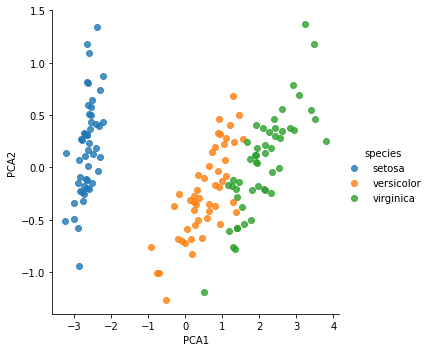

In [45]:
sns.lmplot("PCA1", "PCA2", hue='species', data=df, fit_reg=False);
#여기서 PCA1, PCA2만 plot한거임.그리고 나서 hue = 'species'는 종으로 색깔 구분을 해준거임. (4차원을 2차원으로 만든거임)
#4차원일때는 plot을 못하다가 2차원으로 줄어드니까 plot이 가능해진거임.

### Unsupervised learning: clustering (GMM)
https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2021-02-08-GMM_and_EM/pic1.mp4


(링크 타고 들어가서)

1차원의 데이터임. 이해를 쉽게 하기 위해서 가져오심. 히스토그램이 1차원의 데이터라고 생각하면 됨. 데이터들이 x축에만 있음. 히스토그램이 나타내주는 말은 데이터가 많이 모여있으면 막대기가 높을거임.

(동영상을 보면)

처음에는 빨간색 정규분포가 왼쪽에, 초록색 정규분포가 오른쪽에 있음. 근데 그게 움직이면서 자기 자리르 찾아감. 그러다가 자기 자리 찾아가서 딱 fit할때가 있음. 알고리즘이 알아서 찾아가서 fit해버림.

두개의 정규분포가 있으니, 너가 알아서 fit해라 라고 하면 빨간색은 어디에 있다. 초록색은 어디에 있다. 이걸 찾아주는 거임.


In [46]:
#sepal length, width 그리고 petal length, width 4가지 데이터가 있음. 총 150개의 set로 있음. 
#그게 4차원상에 데이터가 있다고 생각해라. 근데 그건 생각하기 힘드니까 1차원상에 데이터가 있다고 생각해보면, 그룹이 2개로 쪼개져있음.
#1차원상에서 데이터가 clustered되어있더라. (2그룹으로) - 그걸 이름을 A, B로 만들어줌. 만약 4차원상에서도 cluster가 되어있다면 그걸 2개로 쪼개라. 그럼 알아서 쪼갬. 그게 하나 더 있음 3개로 쪼갤 수도 있음.
#예시로 '키'를 생각해봐라. 여자키, 남자키 이렇게 쪼개질 수 있으면 cluster를 만들어라.

In [57]:
from sklearn.mixture import GaussianMixture as GMM   # 1. Choose the model class
model = GMM(n_components=3, covariance_type='full')  # 2. Instantiate the model with hyperparameters
#n_components=3는 아마도 덩어리가 3개 있다는 말임. 우리는 이미 (species)가 3개 있다는 것을 알고 있음.
model.fit(x)                                         # 3. Fit to data. Notice y is not specified!
#동영상에서 정규분포가 찾아가는 거 있었는데 model.fit(x)가 그런 찾아가는 거 실행되는거임.
#unsupervised라서 y가 들어가지 않음. supervised는 반드시 y가 들어감
y_gmm = model.predict(x)                             # 4. Determine cluster labels

In [49]:
y_gmm  #아까 데이터가 150 by 4가 있다고 했음. 그 표 옆에 y_gmm이 붙어서 각각 0,0,1,2,0,0,2,2,1 이런식으로 그룹핑을 해줌.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
#우리는 3개의 덩어리가 있을거라는 걸 아니까 억지로 일단 나눈거임. 그리고 아래 셀에서 확인 작업을 해주는 거임.

In [58]:
df['cluster'] = y_gmm   #위에서 150개로 0,1,2 label해놓은 것을 df로 받은거임 

In [59]:
df   #cluster가 붙여져있음, species와 별개로 GaussianMixture 모델로 clusting해서 예측한 거임.

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,2
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,2
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,2
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


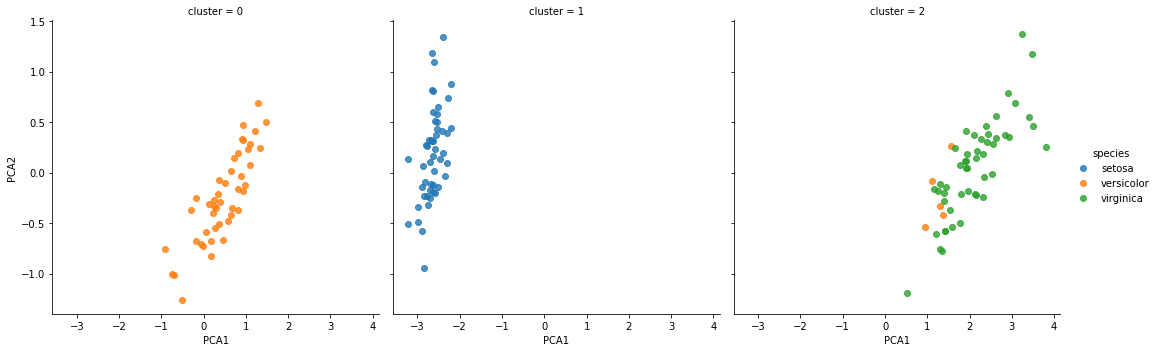

In [60]:
sns.lmplot("PCA1", "PCA2", data=df, hue='species', col='cluster', fit_reg=False);
#위의 plot하고 똑같은데,(PCA1, PCA2로 plot했음)
#근데 cluster 값(0,1,2)을 통해서 위의 그림과 다르게 나누어놓은거임.
#잘보면, 원래 있던 색깔에 따른 정답값(species 값)하고 거의 다 일치함. 일부만 틀림.

다시 한번 요약하자면,
machine learning은 크게 두가지가 있다.
supervised와 unsupervised가 있다.

supervised는 input, output이 명시되어야하고, unsupervised는 input이든 output이든 그냥 한 데이터만 명시되어 있으면 된다.

supervised는 regression, classification(DNN, ANN을 많이 쓴다. 예전에 썼던 그 3가지는 요즘에는 안쓴다)으로 구분되고, unsupervised는 dimensionality, clustering이 있다.

**unsupervised 아주 중요하니 개념 자체를 이해해야함.